In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [652]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [653]:
f1 = pd.read_csv('Fraud_check.csv')

In [654]:
f1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [655]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# EDA

In [656]:
f1[f1.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


{'whiskers': [<matplotlib.lines.Line2D at 0x78454906a8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x78454906ae00>,
 'boxes': [<matplotlib.lines.Line2D at 0x78454906a620>],
 'medians': [<matplotlib.lines.Line2D at 0x78454906b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x78454906b4c0>],
 'means': []}

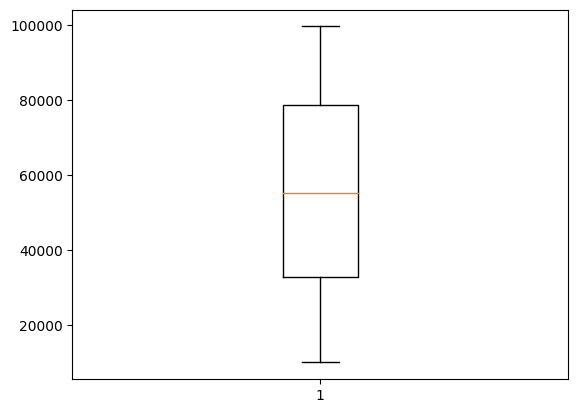

In [657]:
plt.boxplot(f1['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7845490d4910>,
 'caps': [<matplotlib.lines.Line2D at 0x7845490d4e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7845490d4670>],
 'medians': [<matplotlib.lines.Line2D at 0x7845490d5390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7845490d5630>],
 'means': []}

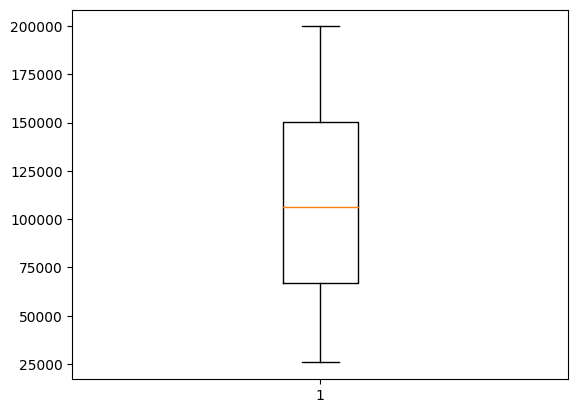

In [658]:
plt.boxplot(f1['City.Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x784549130b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7845491310c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7845491308e0>],
 'medians': [<matplotlib.lines.Line2D at 0x784549131600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7845491318a0>],
 'means': []}

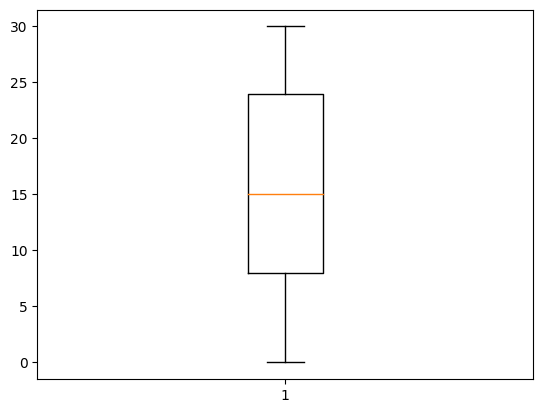

In [659]:
plt.boxplot(f1['Work.Experience'])

In [660]:
f1['Undergrad'] = f1['Undergrad'].astype('category')

In [661]:
f1['Marital.Status'] = f1['Marital.Status'].astype('category')

In [662]:
f1['Urban'] = f1['Urban'].astype('category')

In [663]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital.Status   600 non-null    category
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [664]:
f1 = f1.join(pd.get_dummies(f1[['Undergrad', 'Marital.Status']]))
f1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,Single,68833,50047,10,YES,1,0,0,0,1
1,YES,Divorced,33700,134075,18,YES,0,1,1,0,0
2,NO,Married,36925,160205,30,YES,1,0,0,1,0
3,YES,Single,50190,193264,15,YES,0,1,0,0,1
4,NO,Married,81002,27533,28,NO,1,0,0,1,0


In [665]:
f1 = f1.drop(['Undergrad', 'Marital.Status'], axis = 1)

In [666]:
f1.head()

,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,YES,1,0,0,0,1
1,33700,134075,18,YES,0,1,1,0,0
2,36925,160205,30,YES,1,0,0,1,0
3,50190,193264,15,YES,0,1,0,0,1
4,81002,27533,28,NO,1,0,0,1,0


In [667]:
Conditions=[(f1["Taxable.Income"]<=30000),(f1["Taxable.Income"]>30000)]
Categories=["Risky","Good"]

In [668]:
f1["Taxable.Income"]=np.select(Conditions,Categories)

In [669]:
f1["Taxable.Income"].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Taxable.Income, dtype: object

In [670]:
from sklearn.preprocessing import LabelEncoder

In [671]:
encoder = LabelEncoder()

In [672]:
f1['Urban'] = encoder.fit_transform(f1['Urban'])
f1['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int64

In [673]:
f1['Taxable.Income'] = encoder.fit_transform(f1['Taxable.Income'])
f1['Taxable.Income']

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

# Test-Train Split

In [674]:
X = f1.iloc[:,1:]
X.head()

,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,50047,10,1,1,0,0,0,1
1,134075,18,1,0,1,1,0,0
2,160205,30,1,1,0,0,1,0
3,193264,15,1,0,1,0,0,1
4,27533,28,0,1,0,0,1,0


In [675]:
y= f1.iloc[:,0]

In [676]:
y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [677]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [678]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 8), (120, 8), (480,), (120,))

# Resampling using SMOTE

In [763]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [765]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

# Hyperparameter Tuning (Grid Search)

In [766]:
from sklearn.model_selection import GridSearchCV

In [767]:
pgrid = [{'max_depth':[2,3,4,5,6,7,8,9,10,11,12,50,100,400],'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12,50,100,400], 'min_samples_split':[2,3,4,5,6,7,8]}]

In [768]:
model0 = DecisionTreeClassifier()

In [769]:
grid = GridSearchCV(model0, param_grid = pgrid, cv = 10)

In [770]:
grid.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 50,
                                        100, 400],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             50, 100, 400],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}])

In [771]:
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=50, min_samples_split=5)

In [772]:
grid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 50, 'min_samples_split': 5}

In [773]:
grid.best_score_

0.8056603773584905

In [774]:
best_model.score(X_train, y_train)

0.84375

In [775]:
best_model.score(X_test, y_test)

0.6333333333333333

# Model (Entropy Criterion)

In [853]:
model1 = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy', max_leaf_nodes= 50, min_samples_split = 5)

In [854]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=50,
                       min_samples_split=5)

In [855]:
train_predicted1 = model1.predict(X_train)

In [856]:
confusion_matrix(y_train, train_predicted1)

array([[378,   4],
       [ 59,  39]])

In [857]:
print(classification_report(y_train, train_predicted1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       382
           1       0.91      0.40      0.55        98

    accuracy                           0.87       480
   macro avg       0.89      0.69      0.74       480
weighted avg       0.87      0.87      0.85       480



In [858]:
test_predicted1 = model1.predict(X_test)

In [859]:
confusion_matrix(y_test, test_predicted1)

array([[80, 14],
       [24,  2]])

In [860]:
print(classification_report(y_test, test_predicted1))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        94
           1       0.12      0.08      0.10        26

    accuracy                           0.68       120
   macro avg       0.45      0.46      0.45       120
weighted avg       0.63      0.68      0.65       120



# Visualising the Tree

In [861]:
from sklearn import tree

In [862]:
features = X.columns.values
features

array(['City.Population', 'Work.Experience', 'Urban', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single'], dtype=object)

In [863]:
classes = str(y.unique())
classes

'[0 1]'

[Text(0.5628238341968912, 0.9615384615384616, 'Marital.Status_Married <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]\nclass = ['),
 Text(0.4106217616580311, 0.8846153846153846, 'Work.Experience <= 29.5\nentropy = 0.685\nsamples = 324\nvalue = [265, 59]\nclass = ['),
 Text(0.3238341968911917, 0.8076923076923077, 'Work.Experience <= 23.5\nentropy = 0.666\nsamples = 311\nvalue = [257, 54]\nclass = ['),
 Text(0.23316062176165803, 0.7307692307692307, 'Work.Experience <= 0.5\nentropy = 0.715\nsamples = 244\nvalue = [196, 48]\nclass = ['),
 Text(0.21243523316062177, 0.6538461538461539, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = ['),
 Text(0.2538860103626943, 0.6538461538461539, 'City.Population <= 109749.5\nentropy = 0.727\nsamples = 237\nvalue = [189, 48]\nclass = ['),
 Text(0.19689119170984457, 0.5769230769230769, 'City.Population <= 82976.5\nentropy = 0.647\nsamples = 121\nvalue = [101, 20]\nclass = ['),
 Text(0.14507772020725387, 0.5, 'City.Population <= 80463.0\nentro

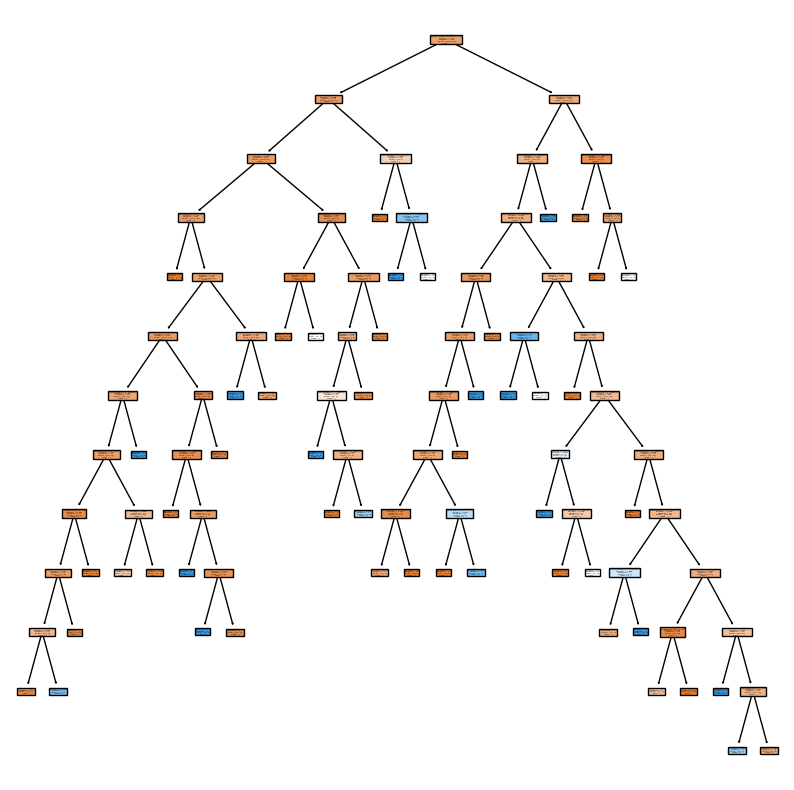

In [864]:
plt.subplots(figsize = (10,10))
tree.plot_tree(model1, feature_names = features, class_names = classes, filled = True)

# Model (Gini Impurity)

In [873]:
model2 = DecisionTreeClassifier(max_depth = 12, criterion = 'gini', max_leaf_nodes= 50, min_samples_split = 5)

In [874]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=50, min_samples_split=5)

In [875]:
train_predicted2 = model2.predict(X_train)

In [876]:
confusion_matrix(y_train, train_predicted2)

array([[380,   2],
       [ 57,  41]])

In [877]:
print(classification_report(y_train, train_predicted2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       382
           1       0.95      0.42      0.58        98

    accuracy                           0.88       480
   macro avg       0.91      0.71      0.75       480
weighted avg       0.89      0.88      0.86       480



In [878]:
test_predicted2 = model2.predict(X_test)

In [879]:
confusion_matrix(y_test, test_predicted2)

array([[87,  7],
       [22,  4]])

In [880]:
print(classification_report(y_test, test_predicted2))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        94
           1       0.36      0.15      0.22        26

    accuracy                           0.76       120
   macro avg       0.58      0.54      0.54       120
weighted avg       0.70      0.76      0.72       120



# Tree Visualising

[Text(0.5449438202247191, 0.9615384615384616, 'Marital.Status_Married <= 0.5\ngini = 0.325\nsamples = 480\nvalue = [382, 98]\nclass = ['),
 Text(0.4044943820224719, 0.8846153846153846, 'Work.Experience <= 29.5\ngini = 0.298\nsamples = 324\nvalue = [265, 59]\nclass = ['),
 Text(0.2808988764044944, 0.8076923076923077, 'Work.Experience <= 23.5\ngini = 0.287\nsamples = 311\nvalue = [257, 54]\nclass = ['),
 Text(0.12359550561797752, 0.7307692307692307, 'Work.Experience <= 6.5\ngini = 0.316\nsamples = 244\nvalue = [196, 48]\nclass = ['),
 Text(0.0449438202247191, 0.6538461538461539, 'City.Population <= 170738.0\ngini = 0.222\nsamples = 63\nvalue = [55, 8]\nclass = ['),
 Text(0.02247191011235955, 0.5769230769230769, 'gini = 0.163\nsamples = 56\nvalue = [51, 5]\nclass = ['),
 Text(0.06741573033707865, 0.5769230769230769, 'Work.Experience <= 4.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = ['),
 Text(0.0449438202247191, 0.5, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 0'),
 Text(0

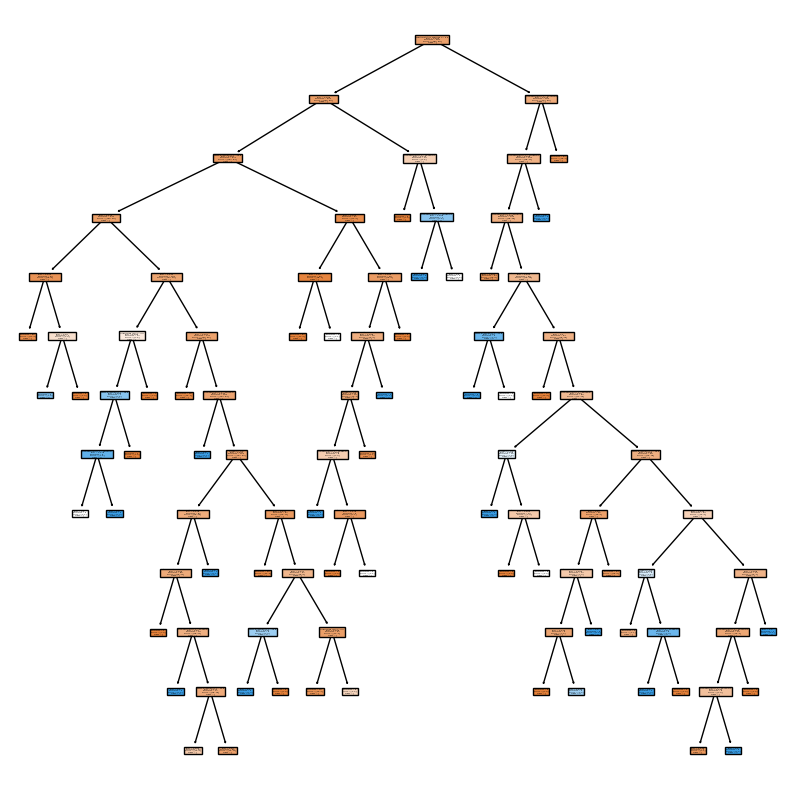

In [881]:
plt.subplots(figsize = (10,10))
tree.plot_tree(model2, feature_names = features, class_names = classes, filled = True)